## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  54.719818   767.980447  0.116568   3.470510  1.228947
1  54.991012   700.281837  0.890821   3.649793  1.464684
2  44.983002   758.822659  0.594677   2.897792  1.542315
3  90.695097   728.014196  0.488777   2.244642  1.071741
4  38.483869  1118.633269  0.105443  10.820179  1.237936


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0044284	total: 68.2ms	remaining: 1m 8s
1:	learn: 0.9951144	total: 68.9ms	remaining: 34.4s
2:	learn: 0.9842808	total: 69.7ms	remaining: 23.2s
3:	learn: 0.9737060	total: 70.6ms	remaining: 17.6s
4:	learn: 0.9606623	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9484224	total: 71.4ms	remaining: 11.8s
6:	learn: 0.9384469	total: 71.9ms	remaining: 10.2s
7:	learn: 0.9272896	total: 72.5ms	remaining: 8.98s
8:	learn: 0.9155568	total: 73.2ms	remaining: 8.06s
9:	learn: 0.9057485	total: 74.4ms	remaining: 7.37s
10:	learn: 0.8974385	total: 75.7ms	remaining: 6.81s
11:	learn: 0.8870995	total: 76.2ms	remaining: 6.28s
12:	learn: 0.8765634	total: 77.3ms	remaining: 5.87s
13:	learn: 0.8699088	total: 79ms	remaining: 5.56s
14:	learn: 0.8593747	total: 80.3ms	remaining: 5.27s
15:	learn: 0.8492764	total: 82.2ms	remaining: 5.06s
16:	learn: 0.8416894	total: 83.6ms	remaining: 4.83s
17:	learn: 0.8335619	total: 84.9ms	remaining: 4.63s
18:	learn: 0.8250962	total: 85.6ms	remaining: 

91:	learn: 0.4130949	total: 154ms	remaining: 1.52s
92:	learn: 0.4103835	total: 157ms	remaining: 1.53s
93:	learn: 0.4074520	total: 158ms	remaining: 1.52s
94:	learn: 0.4035652	total: 159ms	remaining: 1.52s
95:	learn: 0.4002534	total: 160ms	remaining: 1.51s
96:	learn: 0.3971597	total: 161ms	remaining: 1.5s
97:	learn: 0.3940724	total: 162ms	remaining: 1.49s
98:	learn: 0.3915619	total: 164ms	remaining: 1.49s
99:	learn: 0.3880707	total: 165ms	remaining: 1.48s
100:	learn: 0.3845621	total: 166ms	remaining: 1.48s
101:	learn: 0.3812429	total: 167ms	remaining: 1.47s
102:	learn: 0.3785189	total: 168ms	remaining: 1.46s
103:	learn: 0.3764311	total: 169ms	remaining: 1.46s
104:	learn: 0.3735220	total: 170ms	remaining: 1.45s
105:	learn: 0.3704096	total: 171ms	remaining: 1.44s
106:	learn: 0.3679128	total: 172ms	remaining: 1.43s
107:	learn: 0.3649927	total: 172ms	remaining: 1.42s
108:	learn: 0.3623558	total: 173ms	remaining: 1.42s
109:	learn: 0.3595329	total: 174ms	remaining: 1.41s
110:	learn: 0.3569594	

223:	learn: 0.1870375	total: 311ms	remaining: 1.08s
224:	learn: 0.1866575	total: 318ms	remaining: 1.09s
225:	learn: 0.1862101	total: 319ms	remaining: 1.09s
226:	learn: 0.1858540	total: 322ms	remaining: 1.1s
227:	learn: 0.1852804	total: 324ms	remaining: 1.09s
228:	learn: 0.1844480	total: 324ms	remaining: 1.09s
229:	learn: 0.1835038	total: 326ms	remaining: 1.09s
230:	learn: 0.1822688	total: 327ms	remaining: 1.09s
231:	learn: 0.1815613	total: 328ms	remaining: 1.08s
232:	learn: 0.1805520	total: 329ms	remaining: 1.08s
233:	learn: 0.1798758	total: 330ms	remaining: 1.08s
234:	learn: 0.1788705	total: 331ms	remaining: 1.08s
235:	learn: 0.1780737	total: 332ms	remaining: 1.07s
236:	learn: 0.1773449	total: 334ms	remaining: 1.07s
237:	learn: 0.1769099	total: 334ms	remaining: 1.07s
238:	learn: 0.1763622	total: 335ms	remaining: 1.07s
239:	learn: 0.1755079	total: 336ms	remaining: 1.06s
240:	learn: 0.1748191	total: 337ms	remaining: 1.06s
241:	learn: 0.1744328	total: 337ms	remaining: 1.06s
242:	learn: 0

363:	learn: 0.1135762	total: 466ms	remaining: 814ms
364:	learn: 0.1130427	total: 467ms	remaining: 812ms
365:	learn: 0.1127987	total: 467ms	remaining: 810ms
366:	learn: 0.1121652	total: 468ms	remaining: 808ms
367:	learn: 0.1115696	total: 473ms	remaining: 812ms
368:	learn: 0.1110530	total: 474ms	remaining: 810ms
369:	learn: 0.1107459	total: 475ms	remaining: 808ms
370:	learn: 0.1105103	total: 476ms	remaining: 806ms
371:	learn: 0.1099054	total: 476ms	remaining: 804ms
372:	learn: 0.1093025	total: 476ms	remaining: 801ms
373:	learn: 0.1090739	total: 477ms	remaining: 799ms
374:	learn: 0.1087924	total: 479ms	remaining: 798ms
375:	learn: 0.1082081	total: 479ms	remaining: 795ms
376:	learn: 0.1079466	total: 480ms	remaining: 793ms
377:	learn: 0.1074599	total: 481ms	remaining: 791ms
378:	learn: 0.1072046	total: 482ms	remaining: 789ms
379:	learn: 0.1066298	total: 483ms	remaining: 787ms
380:	learn: 0.1062609	total: 483ms	remaining: 785ms
381:	learn: 0.1057792	total: 483ms	remaining: 782ms
382:	learn: 

517:	learn: 0.0648406	total: 626ms	remaining: 582ms
518:	learn: 0.0646912	total: 627ms	remaining: 581ms
519:	learn: 0.0644133	total: 630ms	remaining: 581ms
520:	learn: 0.0641435	total: 631ms	remaining: 580ms
521:	learn: 0.0638715	total: 632ms	remaining: 579ms
522:	learn: 0.0636140	total: 633ms	remaining: 577ms
523:	learn: 0.0633545	total: 634ms	remaining: 576ms
524:	learn: 0.0629582	total: 635ms	remaining: 574ms
525:	learn: 0.0628123	total: 636ms	remaining: 573ms
526:	learn: 0.0624272	total: 637ms	remaining: 571ms
527:	learn: 0.0623170	total: 637ms	remaining: 570ms
528:	learn: 0.0620894	total: 639ms	remaining: 569ms
529:	learn: 0.0620130	total: 639ms	remaining: 567ms
530:	learn: 0.0617148	total: 640ms	remaining: 565ms
531:	learn: 0.0615690	total: 641ms	remaining: 564ms
532:	learn: 0.0614504	total: 642ms	remaining: 562ms
533:	learn: 0.0612989	total: 642ms	remaining: 561ms
534:	learn: 0.0610044	total: 643ms	remaining: 559ms
535:	learn: 0.0608676	total: 644ms	remaining: 558ms
536:	learn: 

673:	learn: 0.0421168	total: 781ms	remaining: 378ms
674:	learn: 0.0419390	total: 784ms	remaining: 378ms
675:	learn: 0.0419218	total: 787ms	remaining: 377ms
676:	learn: 0.0418878	total: 788ms	remaining: 376ms
677:	learn: 0.0418243	total: 789ms	remaining: 374ms
678:	learn: 0.0416455	total: 790ms	remaining: 373ms
679:	learn: 0.0415833	total: 791ms	remaining: 372ms
680:	learn: 0.0414103	total: 792ms	remaining: 371ms
681:	learn: 0.0413720	total: 793ms	remaining: 370ms
682:	learn: 0.0413498	total: 798ms	remaining: 370ms
683:	learn: 0.0412887	total: 799ms	remaining: 369ms
684:	learn: 0.0412513	total: 801ms	remaining: 368ms
685:	learn: 0.0412146	total: 802ms	remaining: 367ms
686:	learn: 0.0410458	total: 803ms	remaining: 366ms
687:	learn: 0.0410243	total: 804ms	remaining: 365ms
688:	learn: 0.0409642	total: 805ms	remaining: 363ms
689:	learn: 0.0409060	total: 806ms	remaining: 362ms
690:	learn: 0.0408471	total: 807ms	remaining: 361ms
691:	learn: 0.0407893	total: 808ms	remaining: 359ms
692:	learn: 

787:	learn: 0.0337597	total: 926ms	remaining: 249ms
788:	learn: 0.0336074	total: 927ms	remaining: 248ms
789:	learn: 0.0335665	total: 928ms	remaining: 247ms
790:	learn: 0.0335226	total: 928ms	remaining: 245ms
791:	learn: 0.0334880	total: 929ms	remaining: 244ms
792:	learn: 0.0333635	total: 930ms	remaining: 243ms
793:	learn: 0.0333298	total: 930ms	remaining: 241ms
794:	learn: 0.0332096	total: 931ms	remaining: 240ms
795:	learn: 0.0331232	total: 931ms	remaining: 239ms
796:	learn: 0.0330864	total: 932ms	remaining: 237ms
797:	learn: 0.0329613	total: 933ms	remaining: 236ms
798:	learn: 0.0329162	total: 933ms	remaining: 235ms
799:	learn: 0.0328284	total: 934ms	remaining: 233ms
800:	learn: 0.0327459	total: 935ms	remaining: 232ms
801:	learn: 0.0327100	total: 935ms	remaining: 231ms
802:	learn: 0.0326748	total: 936ms	remaining: 230ms
803:	learn: 0.0325287	total: 936ms	remaining: 228ms
804:	learn: 0.0324897	total: 937ms	remaining: 227ms
805:	learn: 0.0324509	total: 938ms	remaining: 226ms
806:	learn: 

873:	learn: 0.0292230	total: 1.14s	remaining: 165ms
874:	learn: 0.0291166	total: 1.14s	remaining: 163ms
875:	learn: 0.0290888	total: 1.15s	remaining: 162ms
876:	learn: 0.0289889	total: 1.15s	remaining: 161ms
877:	learn: 0.0289618	total: 1.15s	remaining: 160ms
878:	learn: 0.0289221	total: 1.15s	remaining: 158ms
879:	learn: 0.0288829	total: 1.15s	remaining: 157ms
880:	learn: 0.0288399	total: 1.15s	remaining: 156ms
881:	learn: 0.0288132	total: 1.15s	remaining: 154ms
882:	learn: 0.0287487	total: 1.16s	remaining: 153ms
883:	learn: 0.0286609	total: 1.16s	remaining: 152ms
884:	learn: 0.0286285	total: 1.16s	remaining: 150ms
885:	learn: 0.0285899	total: 1.16s	remaining: 149ms
886:	learn: 0.0285438	total: 1.16s	remaining: 148ms
887:	learn: 0.0285056	total: 1.16s	remaining: 146ms
888:	learn: 0.0284679	total: 1.16s	remaining: 145ms
889:	learn: 0.0284309	total: 1.16s	remaining: 144ms
890:	learn: 0.0283944	total: 1.17s	remaining: 143ms
891:	learn: 0.0283525	total: 1.17s	remaining: 142ms
892:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.33435750800498865


ABC Pre-generator MAE 0.3574773837433285


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

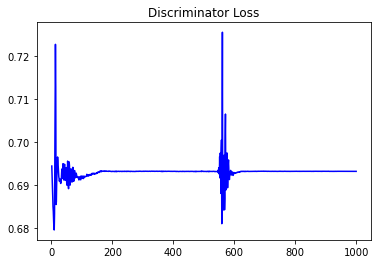

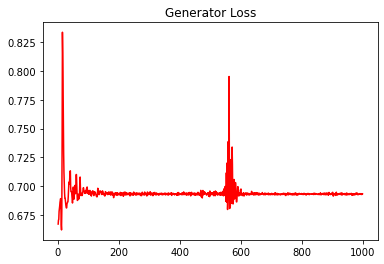

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.33587625767849383


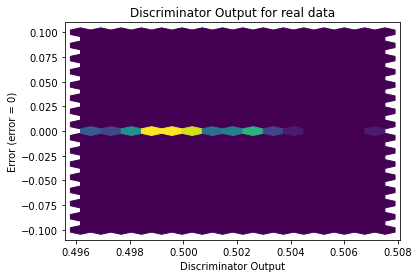

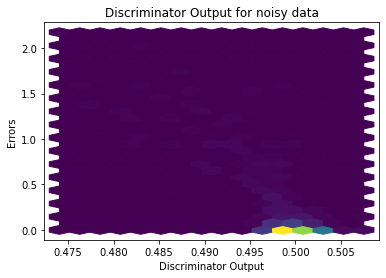

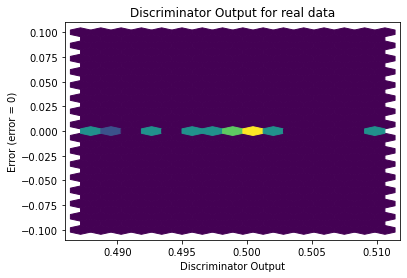

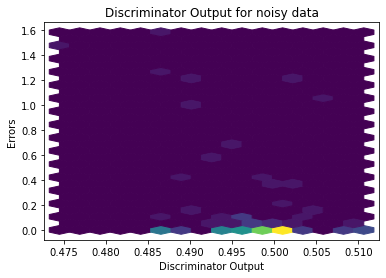

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

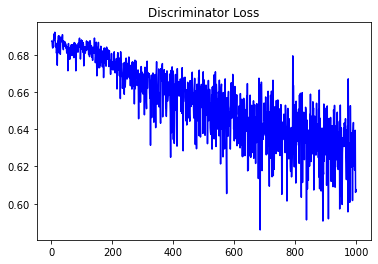

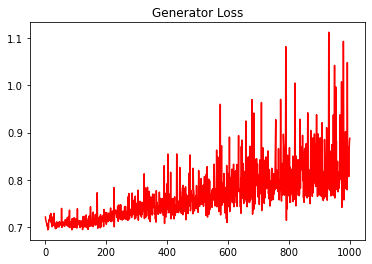

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3718899850789458


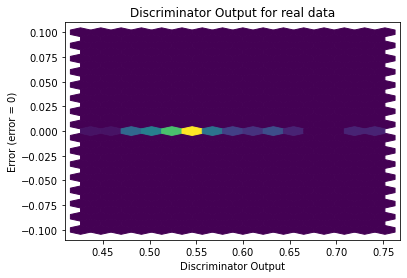

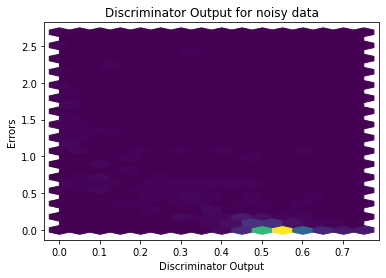

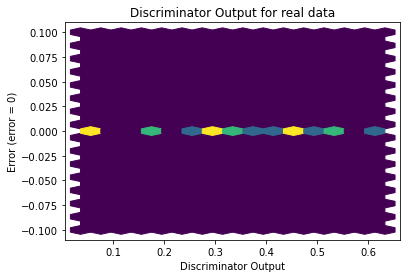

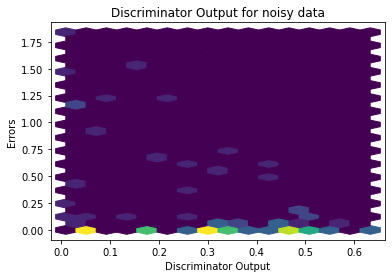

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


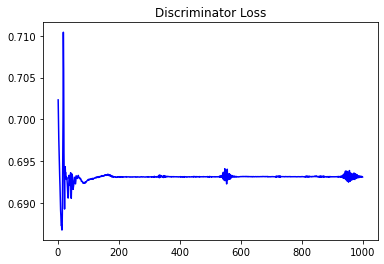

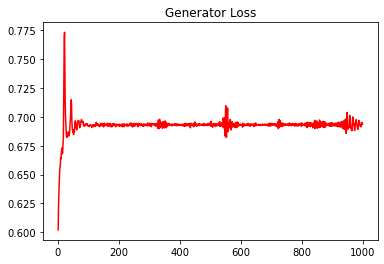

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.32790568357519806


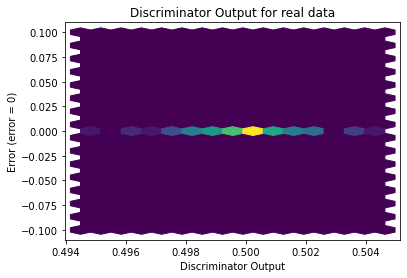

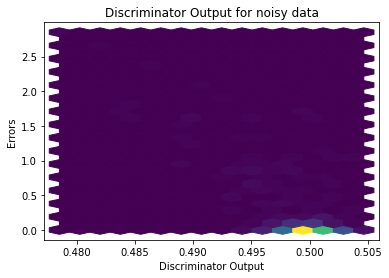

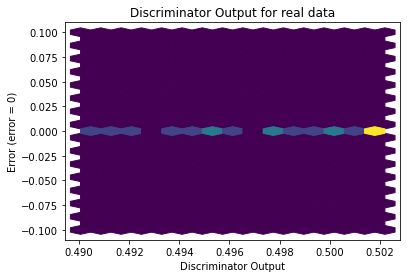

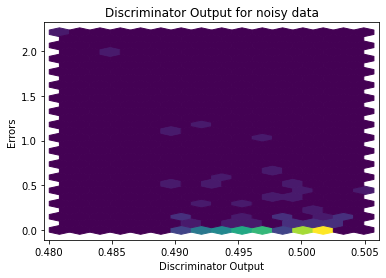

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


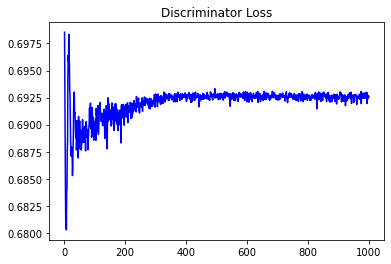

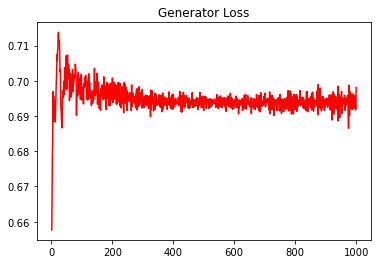

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3199844329841435


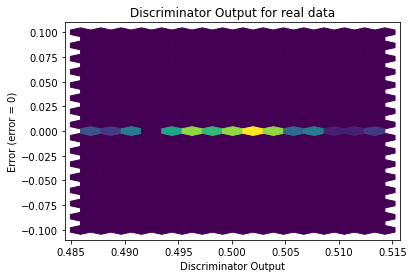

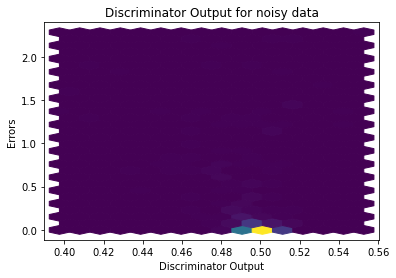

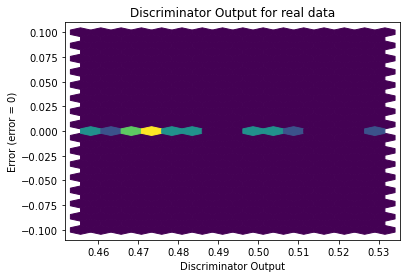

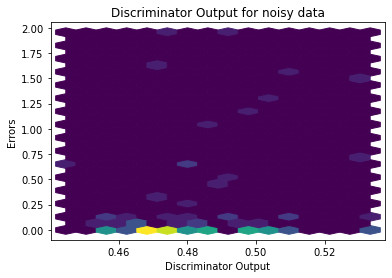

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2894]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0492]], requires_grad=True)
